In [ ]:
import os,sys
os.getcwd()
sys.path.append('code/dataset_utils/woodscape')

In [ ]:
import numpy as np
from pathlib import Path
import sys,os
from generate_params import GEN_PARAMS_DS
import cv2 as cv
from scipy.spatial.transform import Rotation as R
import woodscape_util as wu

In [ ]:
from matplotlib import pyplot as plt


In [ ]:
parser = wu.WoodscapeGenNameParser()
camera_masks = wu.get_camera_masks()

In [ ]:
accepted_mask = "FV_MASK1"

In [ ]:
def is_accepted(x):
    mask_name = wu.MASK_ASSIGNMENT[x.split('.')[0]]
    return mask_name == accepted_mask

In [ ]:
imgs_list = list(filter(is_accepted, os.listdir(wu.IMG_DIR)))

In [ ]:
len(imgs_list)

In [ ]:
img_name = imgs_list[14]
img_path = wu.IMG_DIR / img_name

curr_name = img_name.split('.')[0]

mask = wu.get_mask(camera_masks, curr_name)
intrinsic_file = wu.CALIB_DIR / f'{curr_name}.json'
des = wu.load_descriptor(intrinsic_file)


img = cv.cvtColor(cv.imread(str(img_path)), cv.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def mpl_sphere(img):
    img= img.copy()

    # define a grid matching the map size, subsample along with pixels
    theta = np.linspace(0, np.pi, img.shape[0])
    phi = np.linspace(0, 2*np.pi, img.shape[1])

    count = 30 # keep 180 points along theta and phi
    theta_inds = np.linspace(0, img.shape[0] - 1, count).round().astype(int)
    phi_inds = np.linspace(0, img.shape[1] - 1, count).round().astype(int)
    theta = theta[theta_inds]
    phi = phi[phi_inds]
    img = img[np.ix_(theta_inds, phi_inds)]

    theta,phi = np.meshgrid(theta, phi)
    R = 1

    # sphere
    x = R * np.sin(theta) * np.cos(phi)
    y = R * np.sin(theta) * np.sin(phi)
    z = R * np.cos(theta)

    # create 3d Axes
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x.T, y.T, zs=z.T)
    #ax.plot_surface(x.T, y.T, z.T, facecolors=img/255, cstride=1, rstride=1, shade=False) # we've already pruned ourselves

    # make the plot more spherical
    ax.axis('scaled')


In [ ]:
def direct_proj_sphere(des:wu.cam.ImageDescription):
    
    u,v = np.meshgrid(np.arange(0,int(des.width)),np.arange(0,int(des.height)),indexing="xy")

    x, y, z, mask = des.image2world([u,v])
    
    x =x[mask]
    y =y[mask]
    z =z[mask]

    # create 3d Axes
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x.T, y.T, zs=z.T)
    #ax.plot_surface(x.T, y.T, z.T, facecolors=img/255, cstride=1, rstride=1, shade=False) # we've already pruned ourselves

    # make the plot more spherical
    ax.axis('scaled')

In [ ]:
def direct_proj_plane(des:wu.cam.ImageDescription, des2):
    
    u,v = np.meshgrid(np.arange(0,int(des.width)),np.arange(0,int(des.height)),indexing="xy")

    x, y, mask = wu.mappings.map_points([u,v], [des, des2])

    x =x[mask]
    y =y[mask]

    # create 3d Axes
    fig,axs = plt.subplots(ncols=2)
    axs[0].scatter(u.T, v.T)
    axs[1].scatter(x.T, y.T)
    axs[0].axis('scaled')
    axs[1].axis('scaled')
    #ax.plot_surface(x.T, y.T, z.T, facecolors=img/255, cstride=1, rstride=1, shade=False) # we've already pruned ourselves

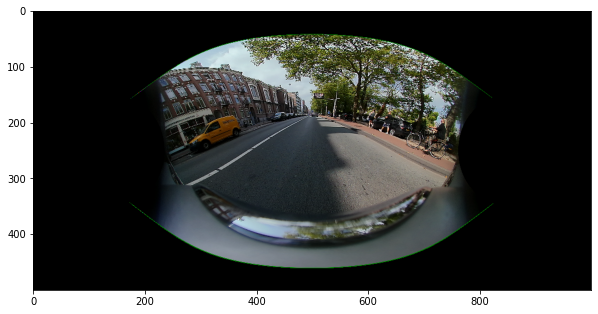

In [21]:
eqr_des = wu.cam.Equirectangular_Description(width=1000, height=500)
img_eqr = wu.mappings.map_img(img, [des, eqr_des])[0]
%matplotlib inline
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.imshow(img_eqr)
plt.show()

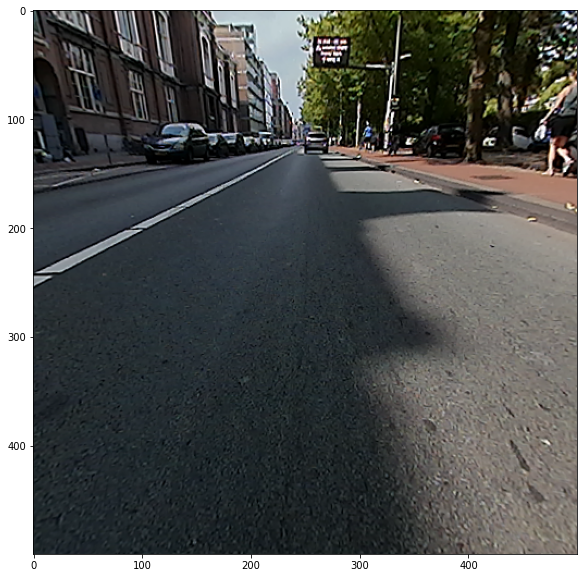

In [34]:
persp_des = wu.cam.Perspective_Description(width=500, height=500, intrinsics=dict(afov=80), extrinsic_rot=[0,0,0])
img_persp = wu.mappings.map_img(img, [des, persp_des])[0]
fig = plt.figure(figsize=(10,10))
plt.imshow(img_persp)
plt.show()

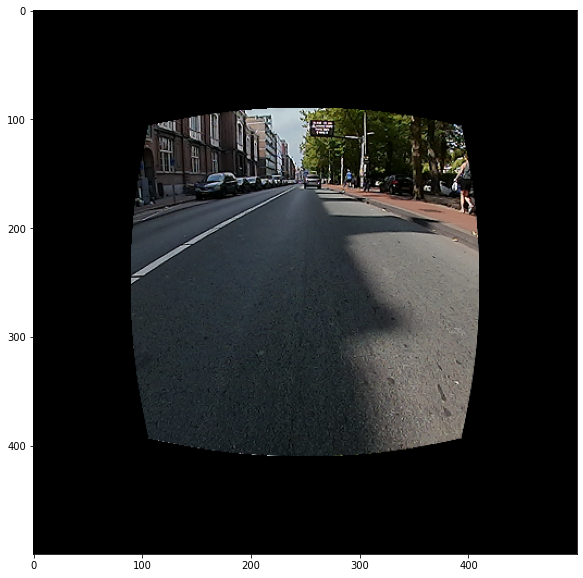

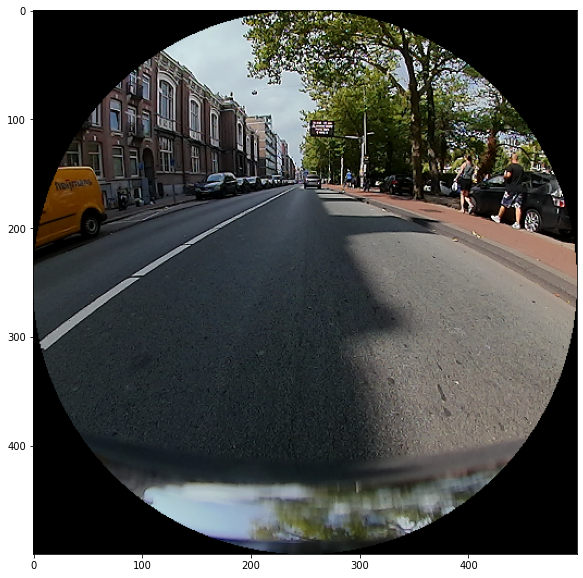

In [38]:
fish_des = wu.cam.FisheyeDS_Description(width=500, height=500, intrinsics=dict(afov=120, a=.52, xi=-.23))
fish_des.extrinsic_rot = persp_des.extrinsic_rot
img_fish = wu.mappings.map_img(img_persp, [persp_des, fish_des])[0]
fig = plt.figure(figsize=(10,10))
plt.imshow(img_fish)
plt.show()

img_fish = wu.mappings.map_img(img, [des, fish_des])[0]
fig = plt.figure(figsize=(10,10))
plt.imshow(img_fish)
plt.show()

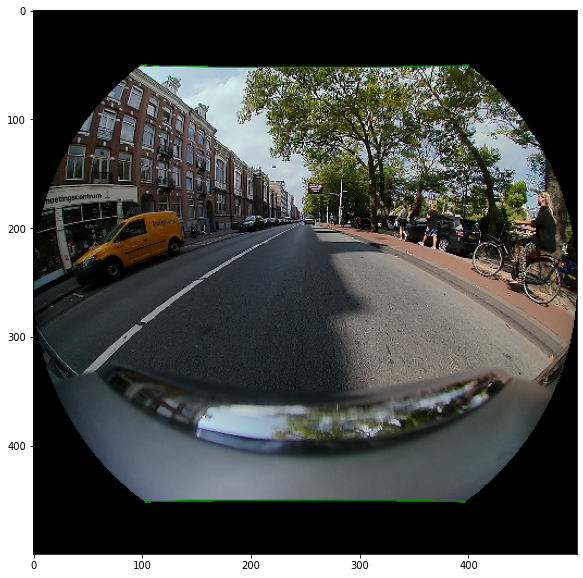

In [40]:
fish_des = wu.cam.FisheyeDS_Description(width=500, height=500, intrinsics=dict(afov=180, a=.52, xi=-.23))
img_fish = wu.mappings.map_img(img, [des, fish_des])[0]
fig = plt.figure(figsize=(10,10))
plt.imshow(img_fish)
plt.show()

In [ ]:
c2p = wu.mappings.Cart2Polar_v2()
c2p.set_sizes_from_src_w(img_fish.shape[:2], img_fish.shape[0] )
img_polar = wu.mappings.map_img_2d(img_fish, c2p)
fig = plt.figure(figsize=(20,20))
plt.imshow(img_polar)
plt.show()

In [ ]:
%matplotlib widget
%matplotlib widget
from matplotlib import pyplot as plt
mpl_sphere(img_eqr)
plt.show()

In [ ]:
my_des = wu.cam.FisheyeDS_Description(30,30,intrinsics=dict(
    afov=200,
    a=.5,
    xi=.1,
))

In [ ]:
%matplotlib widget
%matplotlib widget
from matplotlib import pyplot as plt
direct_proj_sphere(my_des)
plt.show()

In [ ]:
%matplotlib widget
%matplotlib widget
from matplotlib import pyplot as plt
direct_proj_sphere(wu.cam.Perspective_Description(width=30, height=30, intrinsics=dict(afov=120)))
plt.show()

In [ ]:
def plot_vector_field(des:wu.cam.ImageDescription):
    
    u,v = np.meshgrid(np.arange(0,int(des.width)),np.arange(0,int(des.height)),indexing="xy")

    x, y, z, mask = des.image2world([u,v])
    
    u = u[mask]
    v = v[mask]
    
    x =x[mask]
    y =y[mask]
    z =z[mask]

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                        np.arange(-0.8, 1, 0.2),
                        np.arange(-0.8, 1, 0.8))

    u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
    v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
    w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
        np.sin(np.pi * z))

    ax.quiver(x, y, z, u, v, w, length=0.1)

    plt.show()

In [ ]:
direct_proj_plane(wu.cam.Perspective_Description(width=30, height=30, intrinsics=dict(afov=80)),wu.cam.Perspective_Description(width=30, height=30, intrinsics=dict(afov=120)))
plt.show()

In [ ]:
navball = cv.imread("navball.png")

In [ ]:
eqr_des = wu.cam.Equirectangular_Description(width=1024, height=512)
%matplotlib inline
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
print(navball.shape)
plt.imshow(navball)
plt.show()

In [ ]:
my_des = wu.cam.FisheyeDS_Description(500,500,intrinsics=dict(
    afov=200,
    a=.5,
    xi=.1,
))

In [ ]:
import torch
va_vec = my_des.get_va_vector()
va_vec[0]

In [ ]:
va_vec = torch.from_numpy(va_vec)

In [ ]:
prev_va = torch.zeros_like(va_vec)
prev_va[1:] = va_vec[:-1]

In [ ]:
print(prev_va[:10])
print(va_vec[:10])

In [ ]:
ball_reproj = wu.mappings.map_img(navball, [eqr_des, my_des])[0]
print(my_des.get_afov())
print(my_des.get_afov()/2)
fig = plt.figure(figsize=(10,10))
plt.imshow(ball_reproj)
plt.show()

In [ ]:
base_img = wu.mappings.map_img(img, [des, my_des])[0]

In [ ]:
gen_params = wu.get_gen_params_from_mask(params_list=GEN_PARAMS_DS, mask_name=wu.MASK_ASSIGNMENT[curr_name])

In [ ]:
gen_params.params_by_rot[0]

In [ ]:
def add_rot(des, rot):
    base_r = R.from_euler("xyz", des.extrinsic_rot, degrees = True)
    add_r = R.from_euler("xyz", rot, degrees = True)
    comb_r = base_r * add_r
    new_des = des.copy()
    new_des.extrinsic_rot = comb_r.as_euler("xyz", degrees = True)
    return new_des

In [ ]:
def plot_images(imgs):
    nrows=1
    ncols=len(imgs)
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5,nrows*5+1), dpi= 70, squeeze=False)

    for j,img in enumerate(imgs):
        axs[0][j].imshow(img)
        #axs[j].set_axis_off()
        axs[0][j].set_aspect('equal')
        axs[0][j].plot(img.shape[1]/2, img.shape[0]/2, "r+")
    fig.tight_layout(h_pad=0.4, w_pad=0.3) 
    plt.show()

In [ ]:
def show_max_rot_by_side(img, my_des, gen_params, side=0):
    my_des = my_des.copy()
    my_des.extrinsic_rot = gen_params.params_by_rot[side].extrinsic_rot
    mapped_img = wu.mappings.map_img(img, [des, my_des])[0]

    max_rot_delta = gen_params.params_by_rot[side].max_rot_delta
    top_img = wu.mappings.map_img(img, [des, add_rot(my_des, max_rot_delta)])[0]

    plot_images([mapped_img, top_img])

In [ ]:
show_max_rot_by_side(img, my_des, gen_params, side=0)

In [ ]:
show_max_rot_by_side(img, my_des, gen_params, side=1)

In [ ]:
show_max_rot_by_side(img, my_des, gen_params, side=2)

In [ ]:
my_des = my_des.copy()
my_des.extrinsic_rot = gen_params.params_by_rot[0].extrinsic_rot
my_des = add_rot(my_des, gen_params.params_by_rot[0].max_rot_delta)

In [ ]:
i = 0
height = 400
width = 400
max_iters = 100
num_copies = 10
for g in range(num_copies):
    while i<max_iters:
        try:
            gen_des = wu.get_random_des(
                gen_params, 
                wu.cam.FisheyeDS_Description,
                )
            gen_des.extrinsic_rot = my_des.extrinsic_rot
            
            inter_h = 700
            inter_w = 700
            
            gen_des.f *= inter_h / gen_des.height
            gen_des.height = inter_h
            gen_des.width = inter_w
            
            if gen_des.xi_< 0 and gen_des.a_ < 0.4:
                raise wu.BigCropException(message="Bad distortion", img_size=0, crop_size=0)
            max_afov = gen_des.get_va_vector()[-1]
            if max_afov < np.pi/4: # Half-fov
                raise wu.BigCropException(message="Small fov", img_size=0, crop_size=0)
            delta = (max_afov - np.pi/4) / (np.pi/8)
            if np.abs(gen_des.xi_) > delta/2 or gen_des.a_ > delta:
                raise wu.BigCropException(message="Small fov", img_size=0, crop_size=0)
            
            proj_mask, cropped_size = wu.project_mask(mask, des_list=[des, gen_des])
            if np.any(cropped_size < height):
                raise wu.BigCropException(crop_size=cropped_size, img_size=[height, width])
            
            print(i)

            gen_des.f *= height / cropped_size[1]

            gen_des.height = height
            gen_des.width = width
            fin_img = wu.mappings.map_img(img, [des, gen_des])[0]
            print(gen_des.to_dict())
            last_des = gen_des

            cv.imwrite("asd.png", fin_img)
            break

        
        except wu.BigCropException as e:
            i += 1

In [ ]:
mapped_img = wu.mappings.map_img(img, [des, last_des])[0]#
plot_images([mapped_img, fin_img])

In [ ]:
last_des.to_dict()

In [ ]:
gen_params

In [ ]:
from generate_params import random_rotation

In [ ]:
rot = random_rotation(gen_params)
last_des.extrinsic_rot = rot
mapped_img = wu.mappings.map_img(img, [des, last_des])[0]#
plot_images([img, mapped_img])

In [ ]:
show_max_rot_by_side(img, my_des, gen_params, side=1)